## Title vs Salary
* Average salary of Senior Staff is lesser than the Average Salary of Staff
* Average salary of Engineer is lesser than Average salary of Engineer

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import databaseconfig as dbc
%matplotlib inline

In [2]:
# pip install psycopg2-binary is necessary first
# dbc.databaseconfig has all the configurations needed to send as paramater to create_engine
engine = create_engine(dbc.databaseconfig)
connection = engine.connect()

In [3]:
# Query All Records in the the Database
title_salary = pd.read_sql("SELECT titles.title, salaries.salary FROM titles inner join salaries on titles.emp_no = salaries.emp_no", connection)
title_salary.head()

,title,salary
0,Senior Engineer,60117
1,Senior Staff,78228
2,Staff,78228
3,Engineer,72488
4,Staff,42365


In [4]:
title_sal_summary = title_salary.groupby(['title'])['salary'].agg(['mean'])

In [5]:
title_sal_summary['mean'] = round(title_sal_summary['mean'],2)
title_sal_summary.rename(columns = 
                             {'mean': 'Average_Salary'}, inplace = True)

title_sal_summary.reset_index(inplace=True)
title_sal_summary

,title,Average_Salary
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


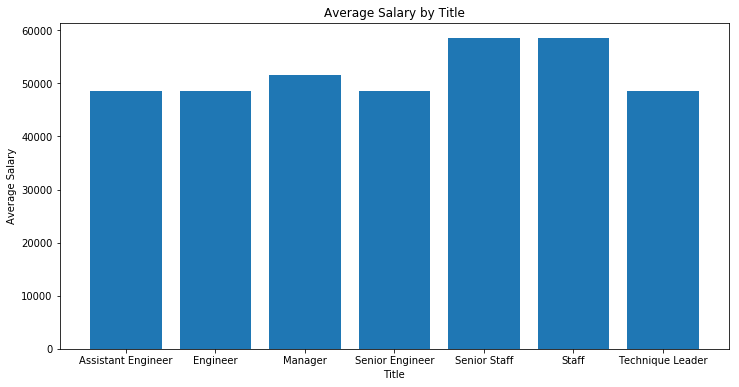

In [6]:
# plot the graphs
plt.rcParams['figure.figsize'] = (12,6)
plt.bar(title_sal_summary['title'],title_sal_summary['Average_Salary'])
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.savefig('./Output - SQL_Scripts and ERD/Title_AvgSalary.png')
plt.show()